## Propulsion Plants Decay Evaluation - (GT Turbine decay state coefficient Prediction)


In [957]:
import pandas as pd

## Data Preprocessing

In [958]:
# Loading dataset
df = pd.read_csv('propulsion.csv')

In [959]:
# Looking at the dataset
df
df.shape

(10000, 19)

In [960]:
# Information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     10000 non-null  int64  
 1   Lever position (lp) [ ]                        10000 non-null  float64
 2   Ship speed (v) [knots]                         10000 non-null  float64
 3   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 4   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 8   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 9   GT Compressor inlet air temperature (T1) [C]   1000

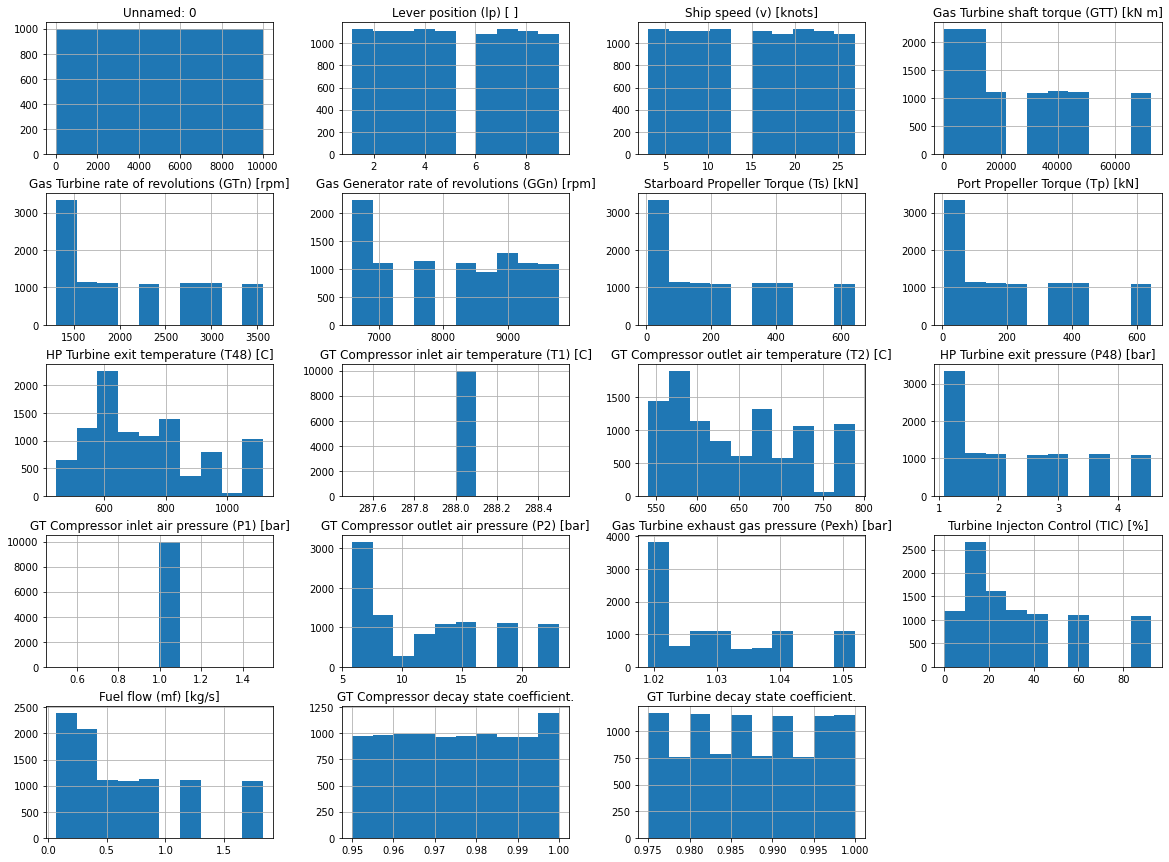

In [961]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(20, 15))
plt.show()

## Droping unnecessry columns

In [962]:
df = df.drop("Unnamed: 0", axis = 1)


In [965]:
df.shape

(10000, 18)

In [966]:
X = df.iloc[:, :-2].values
#y = df.iloc[:, :-1]
y = df.iloc[:, -2].values


## Train-Test Splitting

In [967]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")

Rows in train set: 9000
Rows in test set: 1000



## Looking for correlations

In [968]:
corr_matrix = df.corr()
corr_matrix['GT Turbine decay state coefficient.'].sort_values(ascending=False)

GT Turbine decay state coefficient.              1.000000e+00
Gas Turbine exhaust gas pressure (Pexh) [bar]    1.126419e-02
Gas Generator rate of revolutions (GGn) [rpm]    8.703413e-03
GT Compressor inlet air pressure (P1) [bar]      2.074981e-12
Gas Turbine shaft torque (GTT) [kN m]           -5.327690e-04
Port Propeller Torque (Tp) [kN]                 -6.686727e-04
Starboard Propeller Torque (Ts) [kN]            -6.686727e-04
Gas Turbine rate of revolutions (GTn) [rpm]     -6.767443e-04
GT Compressor decay state coefficient.          -9.849039e-04
Ship speed (v) [knots]                          -1.008008e-03
Lever position (lp) [ ]                         -1.044850e-03
HP Turbine exit pressure (P48) [bar]            -3.527565e-03
GT Compressor outlet air temperature (T2) [C]   -1.806027e-02
Fuel flow (mf) [kg/s]                           -1.816774e-02
Turbine Injecton Control (TIC) [%]              -1.916872e-02
GT Compressor outlet air pressure (P2) [bar]    -1.917078e-02
HP Turbi

array([[<AxesSubplot:xlabel='GT Turbine decay state coefficient.', ylabel='GT Turbine decay state coefficient.'>,
        <AxesSubplot:xlabel='HP Turbine exit temperature (T48) [C]', ylabel='GT Turbine decay state coefficient.'>],
       [<AxesSubplot:xlabel='GT Turbine decay state coefficient.', ylabel='HP Turbine exit temperature (T48) [C]'>,
        <AxesSubplot:xlabel='HP Turbine exit temperature (T48) [C]', ylabel='HP Turbine exit temperature (T48) [C]'>]],
      dtype=object)

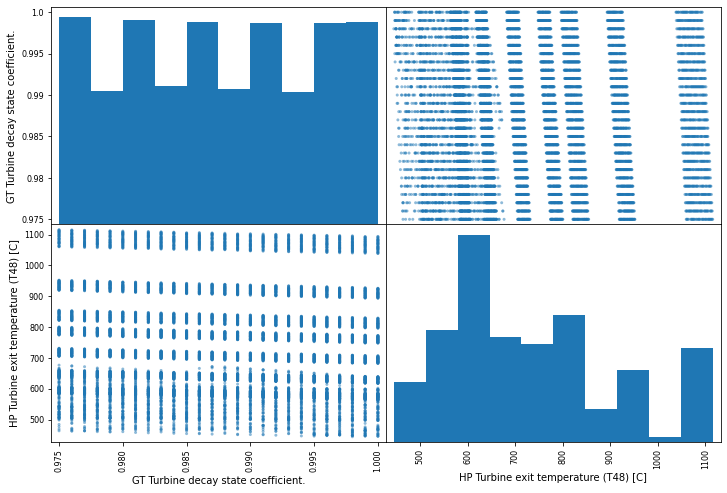

In [969]:
# from pandas.plotting import scatter_matrix
attributes = ["GT Turbine decay state coefficient.", "HP Turbine exit temperature (T48) [C]"]
scatter_matrix(df[attributes], figsize = (12,8))

In [970]:
df.shape

(10000, 18)

## Creating Pipeline

In [971]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


## Selecting the model

In [972]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## Evaluating the model 

In [973]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_train)
mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)

In [974]:
print(rmse)

0.0003803893473213429


## Using cross-validation 

In [975]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

In [976]:
print(rmse_scores)

[0. 0. 0. 0. 0.]


In [977]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [978]:
print_scores(rmse_scores)

Scores: [0. 0. 0. 0. 0.]
Mean:  0.0011211254976645102
Standard deviation:  0.00019142017958711827


## Predicting the Test set results 

In [979]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.95 0.95]
 [0.95 0.95]
 [0.96 0.96]
 ...
 [0.96 0.96]
 [0.98 0.98]
 [0.97 0.97]]


## R2 Score

In [980]:
from sklearn.metrics import r2_score
print('Random Forest Evalution',r2_score(y_test, y_pred))

Random Forest Evalution 0.9949044076197938
